In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [254]:
df=pd.read_csv(".\dataset\TSLA.csv")

In [255]:
df.shape

(2416, 7)

In [256]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [257]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [258]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [259]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Checking for missing values

In [260]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Checking for duplicated rows

In [261]:
df.loc[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [262]:
df['Date'] = pd.to_datetime(df['Date'])
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

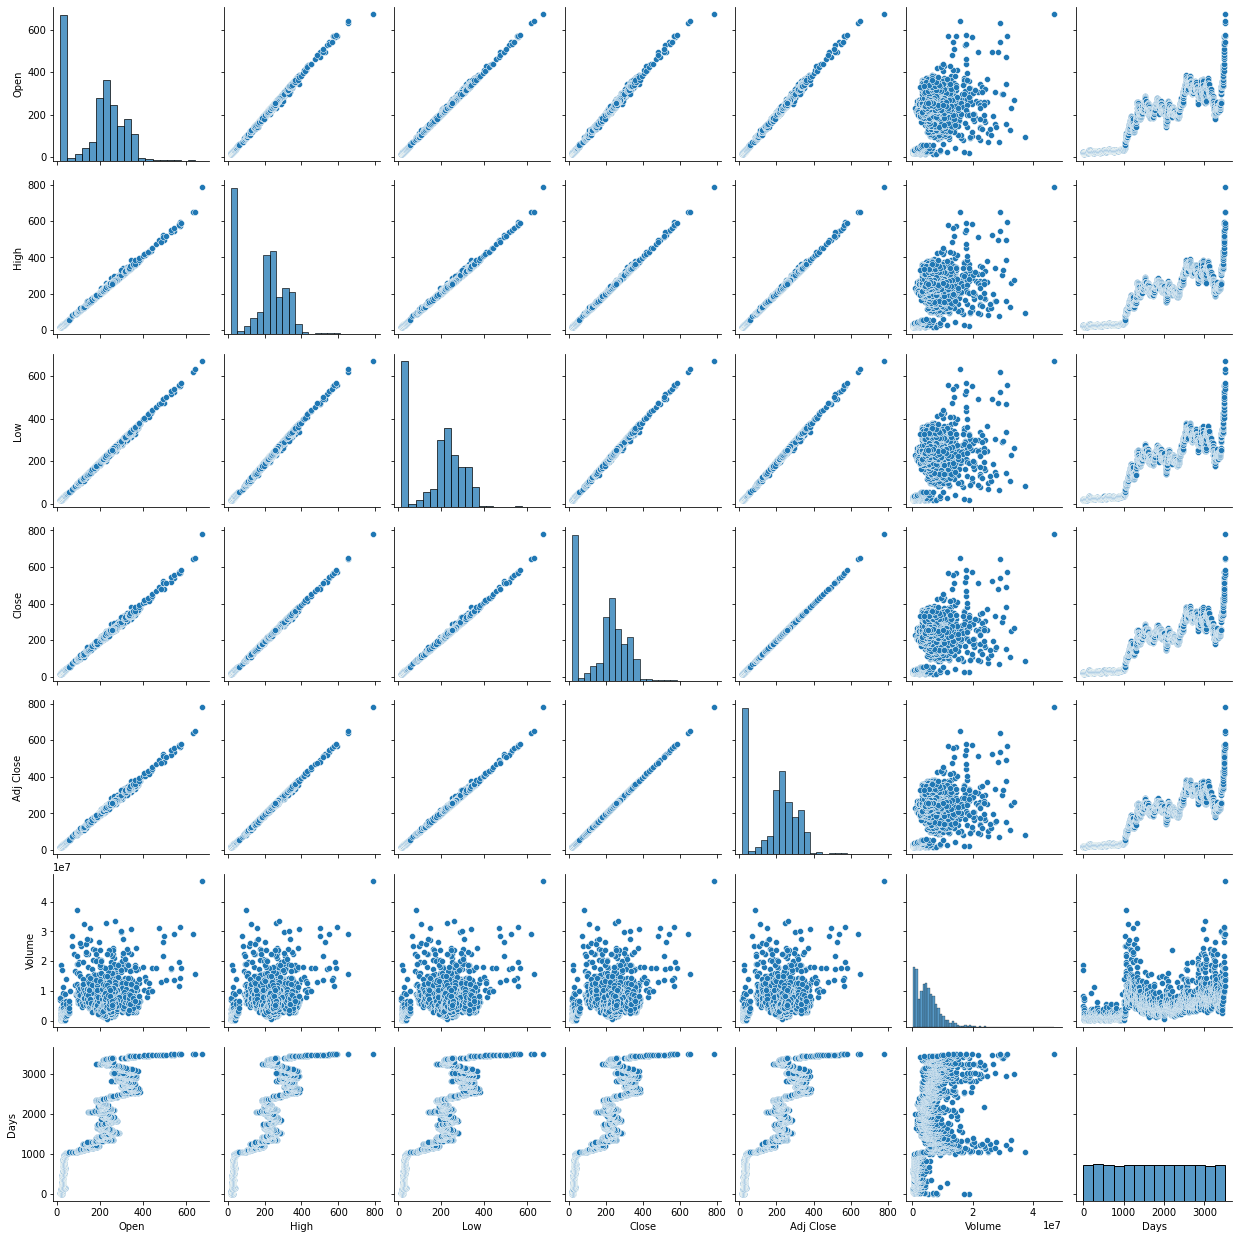

In [263]:
sns.pairplot(df)

In [264]:
corr=df.corr()
corr

,Date,Open,High,Low,Close,Adj Close,Volume,Days
Date,1.000000,0.891110,0.890536,0.890960,0.890294,0.890294,0.477066,1.000000
Open,0.891110,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762,0.891110
High,0.890536,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944,0.890536
Low,0.890960,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496,0.890960
Close,0.890294,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169,0.890294
Adj Close,0.890294,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169,0.890294
Volume,0.477066,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000,0.477066
Days,1.000000,0.891110,0.890536,0.890960,0.890294,0.890294,0.477066,1.000000


In [265]:
features=['Open', 'High', 'Low', 'Adj Close','Volume','Days']
X=df[features]

y=df['Close']

In [266]:
# X = df[features].copy()
# X['Bias'] = 1
# X

In [267]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Days
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000
mean,2015-04-15 11:09:56.026490112,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06,1751.465232
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,0.000000
25%,2012-11-19 18:00:00,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06,874.750000
50%,2015-04-16 12:00:00,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06,1752.500000
75%,2017-09-07 06:00:00,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06,2627.250000
max,2020-02-03 00:00:00,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,3506.000000
std,NaN,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06,1012.571035


In [268]:
from sklearn.preprocessing import StandardScaler

Random state the level of shuffling before splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Should bring all the features to same scale,otherwise the model may not converge. Weights may go to infinity.

fit_transform for the training set and transform for the test set. That way test test set is standardized according to mean and std of training set. 

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit to training, transform training
X_test = scaler.transform(X_test) 

In [270]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [271]:
# from sklearn.metrics import r2_score
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse:.2f}')
# print(f'R-squared: {r2:.2f}')

Adding a bias variable must be done after scaling. Otherwise all the ones will be converted to zero during scaling.

In [272]:
bias_train=np.ones(X_train.shape[0]).reshape(-1,1)
bias_test=np.ones(X_test.shape[0]).reshape(-1,1)
X_train=np.hstack((X_train,bias_train))
X_test=np.hstack((X_test,bias_test))

In [273]:
learning_rate=0.01
w=np.zeros(7)
n_rows=len(X_train)

In [274]:
print(X_train.shape)
print(X_train.T.shape)
print(w.shape)
print(X_test.shape)
print(y_test.shape)

(1932, 7)
(7, 1932)
(7,)
(484, 7)
(484,)


In [275]:
epochs=300
w_history=[]
e=[]

for i in range(epochs):
    y_hat=np.dot(X_train,w.T)
    e.append(sum((y_train-y_hat)**2)/n_rows)
    w=w+learning_rate*2*np.dot(X_train.T,y_train-y_hat)/n_rows
    w_history.append(w.copy())

w_history=np.array(w_history)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


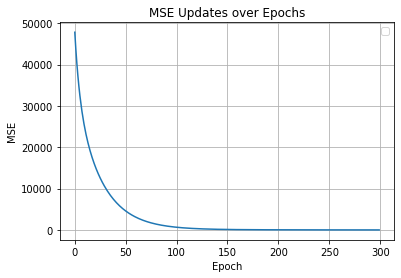

In [276]:
plt.plot(e)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE Updates over Epochs")
plt.legend()
plt.grid(True)
plt.show()

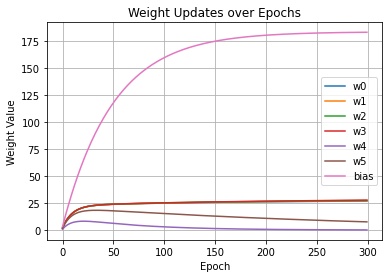

In [277]:
labels = ['w0', 'w1', 'w2', 'w3', 'w4','w5','bias']  # or whatever your feature names are

for i in range(w_history.shape[1]):
    plt.plot([w[i] for w in w_history], label=labels[i])

plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("Weight Updates over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [278]:
print(w)

[ 27.22358258  27.57513746  27.7195711   28.06399016   0.47980979
   7.92892844 183.45795673]


In [279]:
y_predicted=np.dot(X_test,w.T)

In [280]:
print(y_predicted.shape)
print(y_test.shape)

(484,)
(484,)


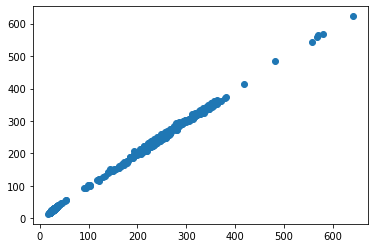

In [281]:
plt.scatter(y_test,y_predicted)

In [282]:
from sklearn.metrics import r2_score


mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 20.81
R-squared: 1.00
